In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

filename = "normalized_result.csv"
df = pd.read_csv(filename)
df["Количество"] = df["Количество"].map(float)
df.head(3)

,Ссылка,Файл,Суд,Дата приговора,ФИО,Смягчающие обстоятельства,Вид наказания,Особый порядок,Отбывал ли ранее лишение свободы,Судимость,Наркотики,Главный наркотик,Размер,Срок наказания в месяцах,Отягчающие обстоятельства,Категория наркотика,Количество
0,https://morozovsky.ros.sudrf.ru/modules.php?na...,morozovsky.ros.sudrf.ru_0027-517468893.txt,морозовский районный суд ростовской области,2017/2/13,"милькиной о.ю., с участием защитника адвоката ...",наличие несовершеннолетней дочери на дату сове...,Лишение свободы,нет,нет данных,да,"героин.?.?: 0,368 грамма",героин.?.?,Крупный,нет,"рецидив преступлений,совершение преступления с...",Героин,0.368
1,https://syzransky.sam.sudrf.ru/modules.php?nam...,syzransky.sam.sudrf.ru_0010-131059839.txt,ОШИБКА: Запрошенный URL не может быть получен,2018/5/31,варельджана а.ф. правильно квалифицированы по ...,нет данных,Лишение свободы,да,нет данных,да,"героин.?.?: 42,220 грамма",героин.?.?,Крупный,нет,рецидив преступлений,Героин,42.220
2,https://leninsky.ros.sudrf.ru/modules.php?name...,leninsky.ros.sudrf.ru_0108-457978243.txt,ленинский районный суд г. ростова-на-дону,2017/4/24,сердюкова с.п.,нет данных,Лишение свободы,да,да,да,"являющееся производным: 0,1 грамм",являющееся производным,Крупный,нет,рецидив преступлений,Производное,0.100


# Основные показатели

Всего дел: 29437
Дел с осуждением:  13565
Из них, с не нулевым количеством наркотика:  9270


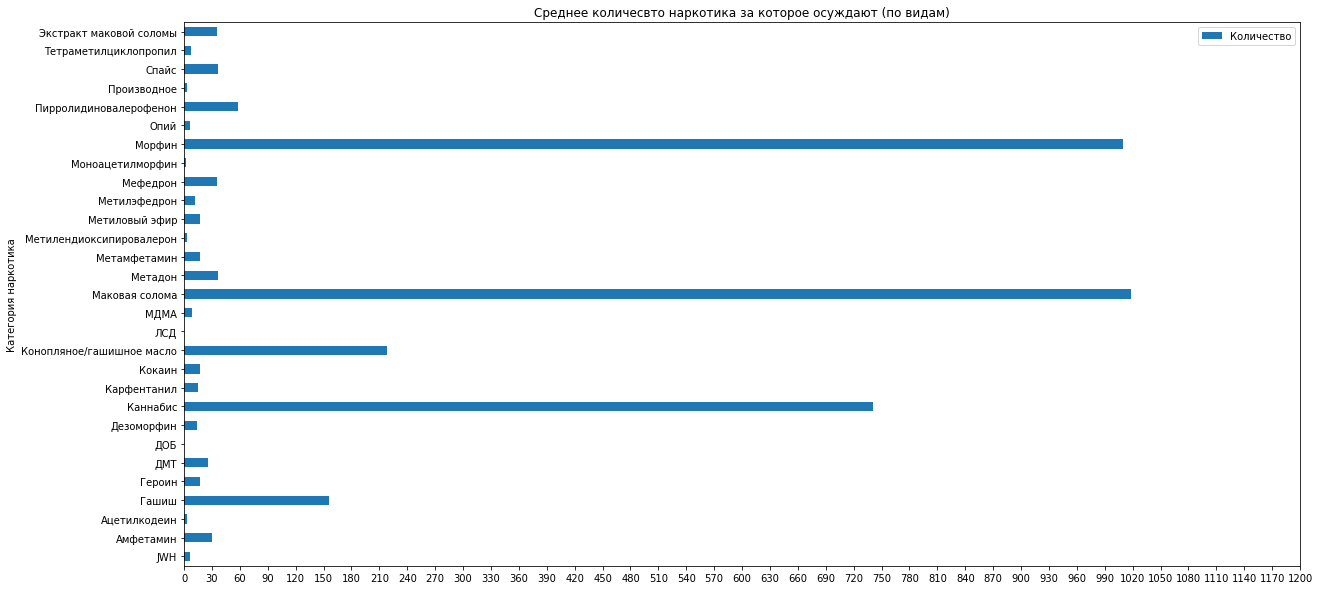

In [32]:
print("Всего дел:", len(df))
convicted = df[~df["Срок наказания в месяцах"].str.contains("нет|нет данных")]
imprisoned = convicted[convicted["Вид наказания"]=="Лишение свободы"] 
print("Дел с осуждением: ", len(imprisoned))
has_weight = imprisoned.dropna(subset=["Количество"])
print("Из них, с не нулевым количеством наркотика: ", len(has_weight))
ticks = np.arange(0, 1230, 30)
has_weight.pivot_table(['Количество'],['Категория наркотика'], aggfunc='mean').plot(
    kind="barh", figsize=(20,10), xticks=ticks, title="Cреднее количесвто наркотика за которое осуждают (по видам)");

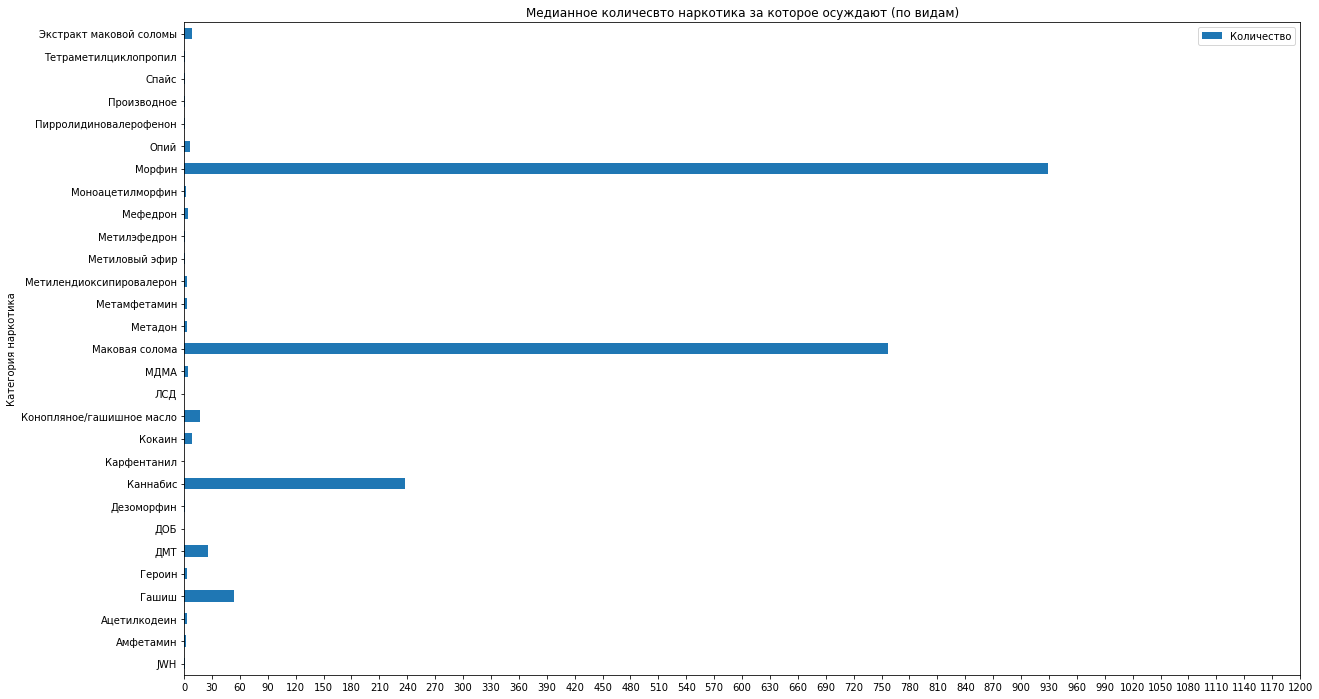

In [28]:
has_weight.pivot_table(['Количество'],['Категория наркотика'], aggfunc='median').plot(
    kind="barh", figsize=(20,12), xticks=ticks, title = "Медианное количесвто наркотика за которое осуждают (по видам)");

In [29]:
# Количество дел, где, не имеющих судимости, без отягчающих, приговаривают к реальному лишению свободы; средний срок лишения свободы в этом случае.
no_criminal_record = df[df["Судимость"]=="нет"]
print("Дел, не имеющих судимости: ", len(no_criminal_record))
no_aggravating_circumstances = no_criminal_record[no_criminal_record["Отягчающие обстоятельства"]=="нет данных"]
print("Из них, не имеющих отягчающих обстоятельств: ", len(no_aggravating_circumstances))
imprisoned = no_aggravating_circumstances[no_aggravating_circumstances["Вид наказания"]=="Лишение свободы"]
print("Из них, с лишением свободы: ", len(imprisoned))
terms = imprisoned[~imprisoned["Срок наказания в месяцах"].str.contains("нет|нет данных")]["Срок наказания в месяцах"].map(int)
print("Средний срок лишения свободы среди дел, где, не имеющих судимости, без отягчающих, приговаривают к реальному лишению свободы:\n", round(terms.mean(),3), "мес")
print("Медианный срок лишения свободы среди дел, где, не имеющих судимости, без отягчающих, приговаривают к реальному лишению свободы:\n", round(terms.median(),3), "мес")

Дел, не имеющих судимости:  15188
Из них, не имеющих отягчающих обстоятельств:  13041
Из них, с лишением свободы:  6301
Средний срок лишения свободы среди дел, где, не имеющих судимости, без отягчающих, приговаривают к реальному лишению свободы:
 84.628 мес
Медианный срок лишения свободы среди дел, где, не имеющих судимости, без отягчающих, приговаривают к реальному лишению свободы:
 36.0 мес


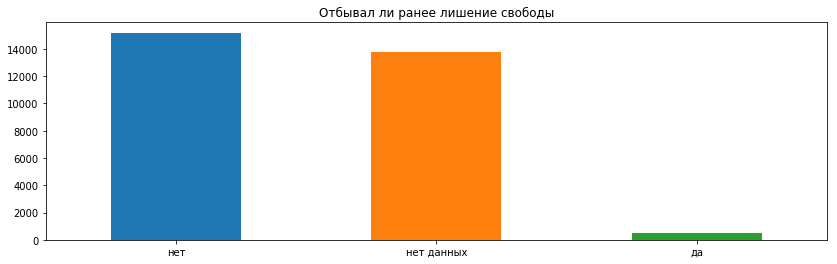

In [41]:
df["Отбывал ли ранее лишение свободы"].value_counts().plot(
    kind='bar', title="Отбывал ли ранее лишение свободы", rot=0, figsize=(14,4));

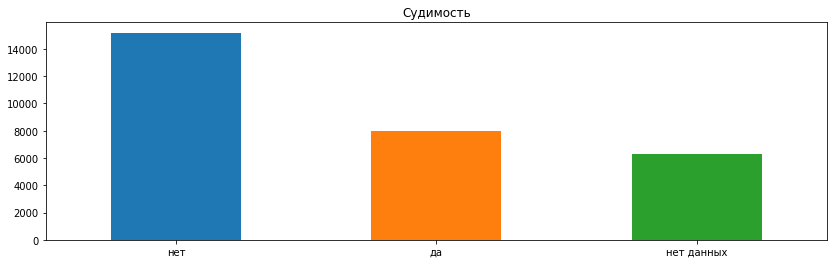

In [36]:
df.Судимость.value_counts().plot(
    kind='bar', title="Судимость", rot=0, figsize=(14,4));

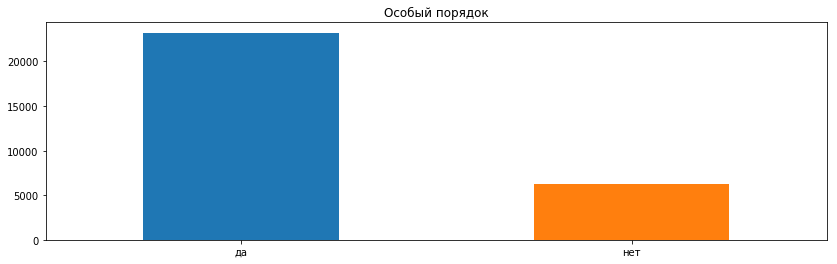

In [37]:
df["Особый порядок"].value_counts().plot(
    kind='bar', title="Особый порядок", rot=0, figsize=(14,4));

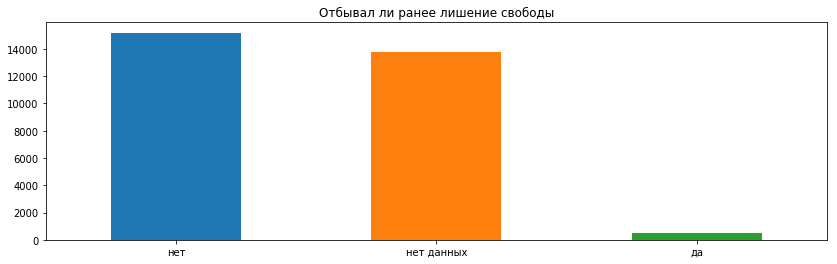

In [38]:
df["Отбывал ли ранее лишение свободы"].value_counts().plot(
    kind='bar', title="Отбывал ли ранее лишение свободы", rot=0, figsize=(14,4));

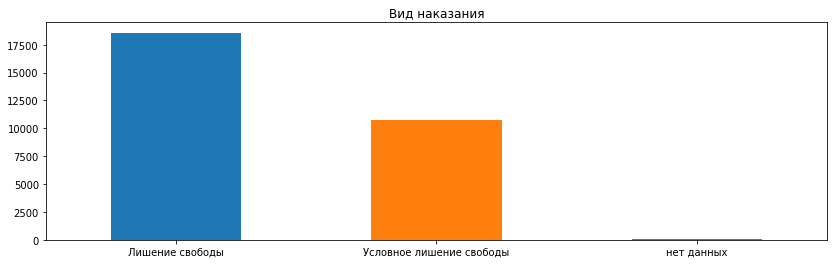

In [39]:
df["Вид наказания"].value_counts().plot(
    kind='bar', title="Вид наказания", rot=0, figsize=(14,4));